# Purpose of tis Notebook

This notebook is used for training the test models. It inputs numpy arrays that are extracted by extract_arrays.ipynb. tHe paths to these should be entered in the FEATURES_PATH and LABELS_PATH variables.

The notebook trains the models and print the evaluate results. It also saves the models for reuse. 




In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import datetime as dt
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib import pyplot as plt

In [2]:
FEATURES_PATH = "data/my_20_sec_features-2022_05_21__11_42_45.npy"
LABELS_PATH = "data/my_20_sec_labels-2022_05_21__11_42_45.npy"

SEED = 42

In [3]:
with open(FEATURES_PATH, 'rb') as f:
    features = np.load(f)
features.shape

(3000, 200, 150, 2)

In [4]:
with open(LABELS_PATH, 'rb') as f:
    labels = np.load(f)
labels.shape

(3000,)

In [5]:
labels = [label.split('-')[0] for label in labels]
labels[:10]

['www.youtube.com',
 'www.bbc.co.uk',
 'www.facebook.com',
 'www.twitter.com',
 'www.wikipedia.com',
 'www.ebay.co.uk',
 'www.google.com',
 'www.google.com',
 'www.bbc.co.uk',
 'www.ebay.co.uk']

In [6]:
label_binariser = LabelBinarizer()
labels_encoded = label_binariser.fit_transform(labels)
labels_encoded.shape

(3000, 10)

In [17]:
cnn = keras.Sequential()

cnn.add(layers.InputLayer((200,150,2)))
cnn.add(layers.Conv2D(filters=10, kernel_size=(3,3)))
# cnn.add(layers.MaxPool2D(pool_size=(2,2), padding = 'same', data_format = "channels_last"))
cnn.add(layers.Conv2D(filters=24, kernel_size=(3,3)))
# cnn.add(layers.MaxPool2D(pool_size=(2,2), padding = 'same', data_format = "channels_last"))
cnn.add(layers.Conv2D(filters=32, kernel_size=(3,3)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation="relu"))
cnn.add(layers.Dense(labels_encoded.shape[1], activation="softmax"))

cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 198, 148, 10)      190       
                                                                 
 conv2d_10 (Conv2D)          (None, 196, 146, 24)      2184      
                                                                 
 conv2d_11 (Conv2D)          (None, 194, 144, 32)      6944      
                                                                 
 flatten_3 (Flatten)         (None, 893952)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                57212992  
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 57,222,960
Trainable params: 57,222,960


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

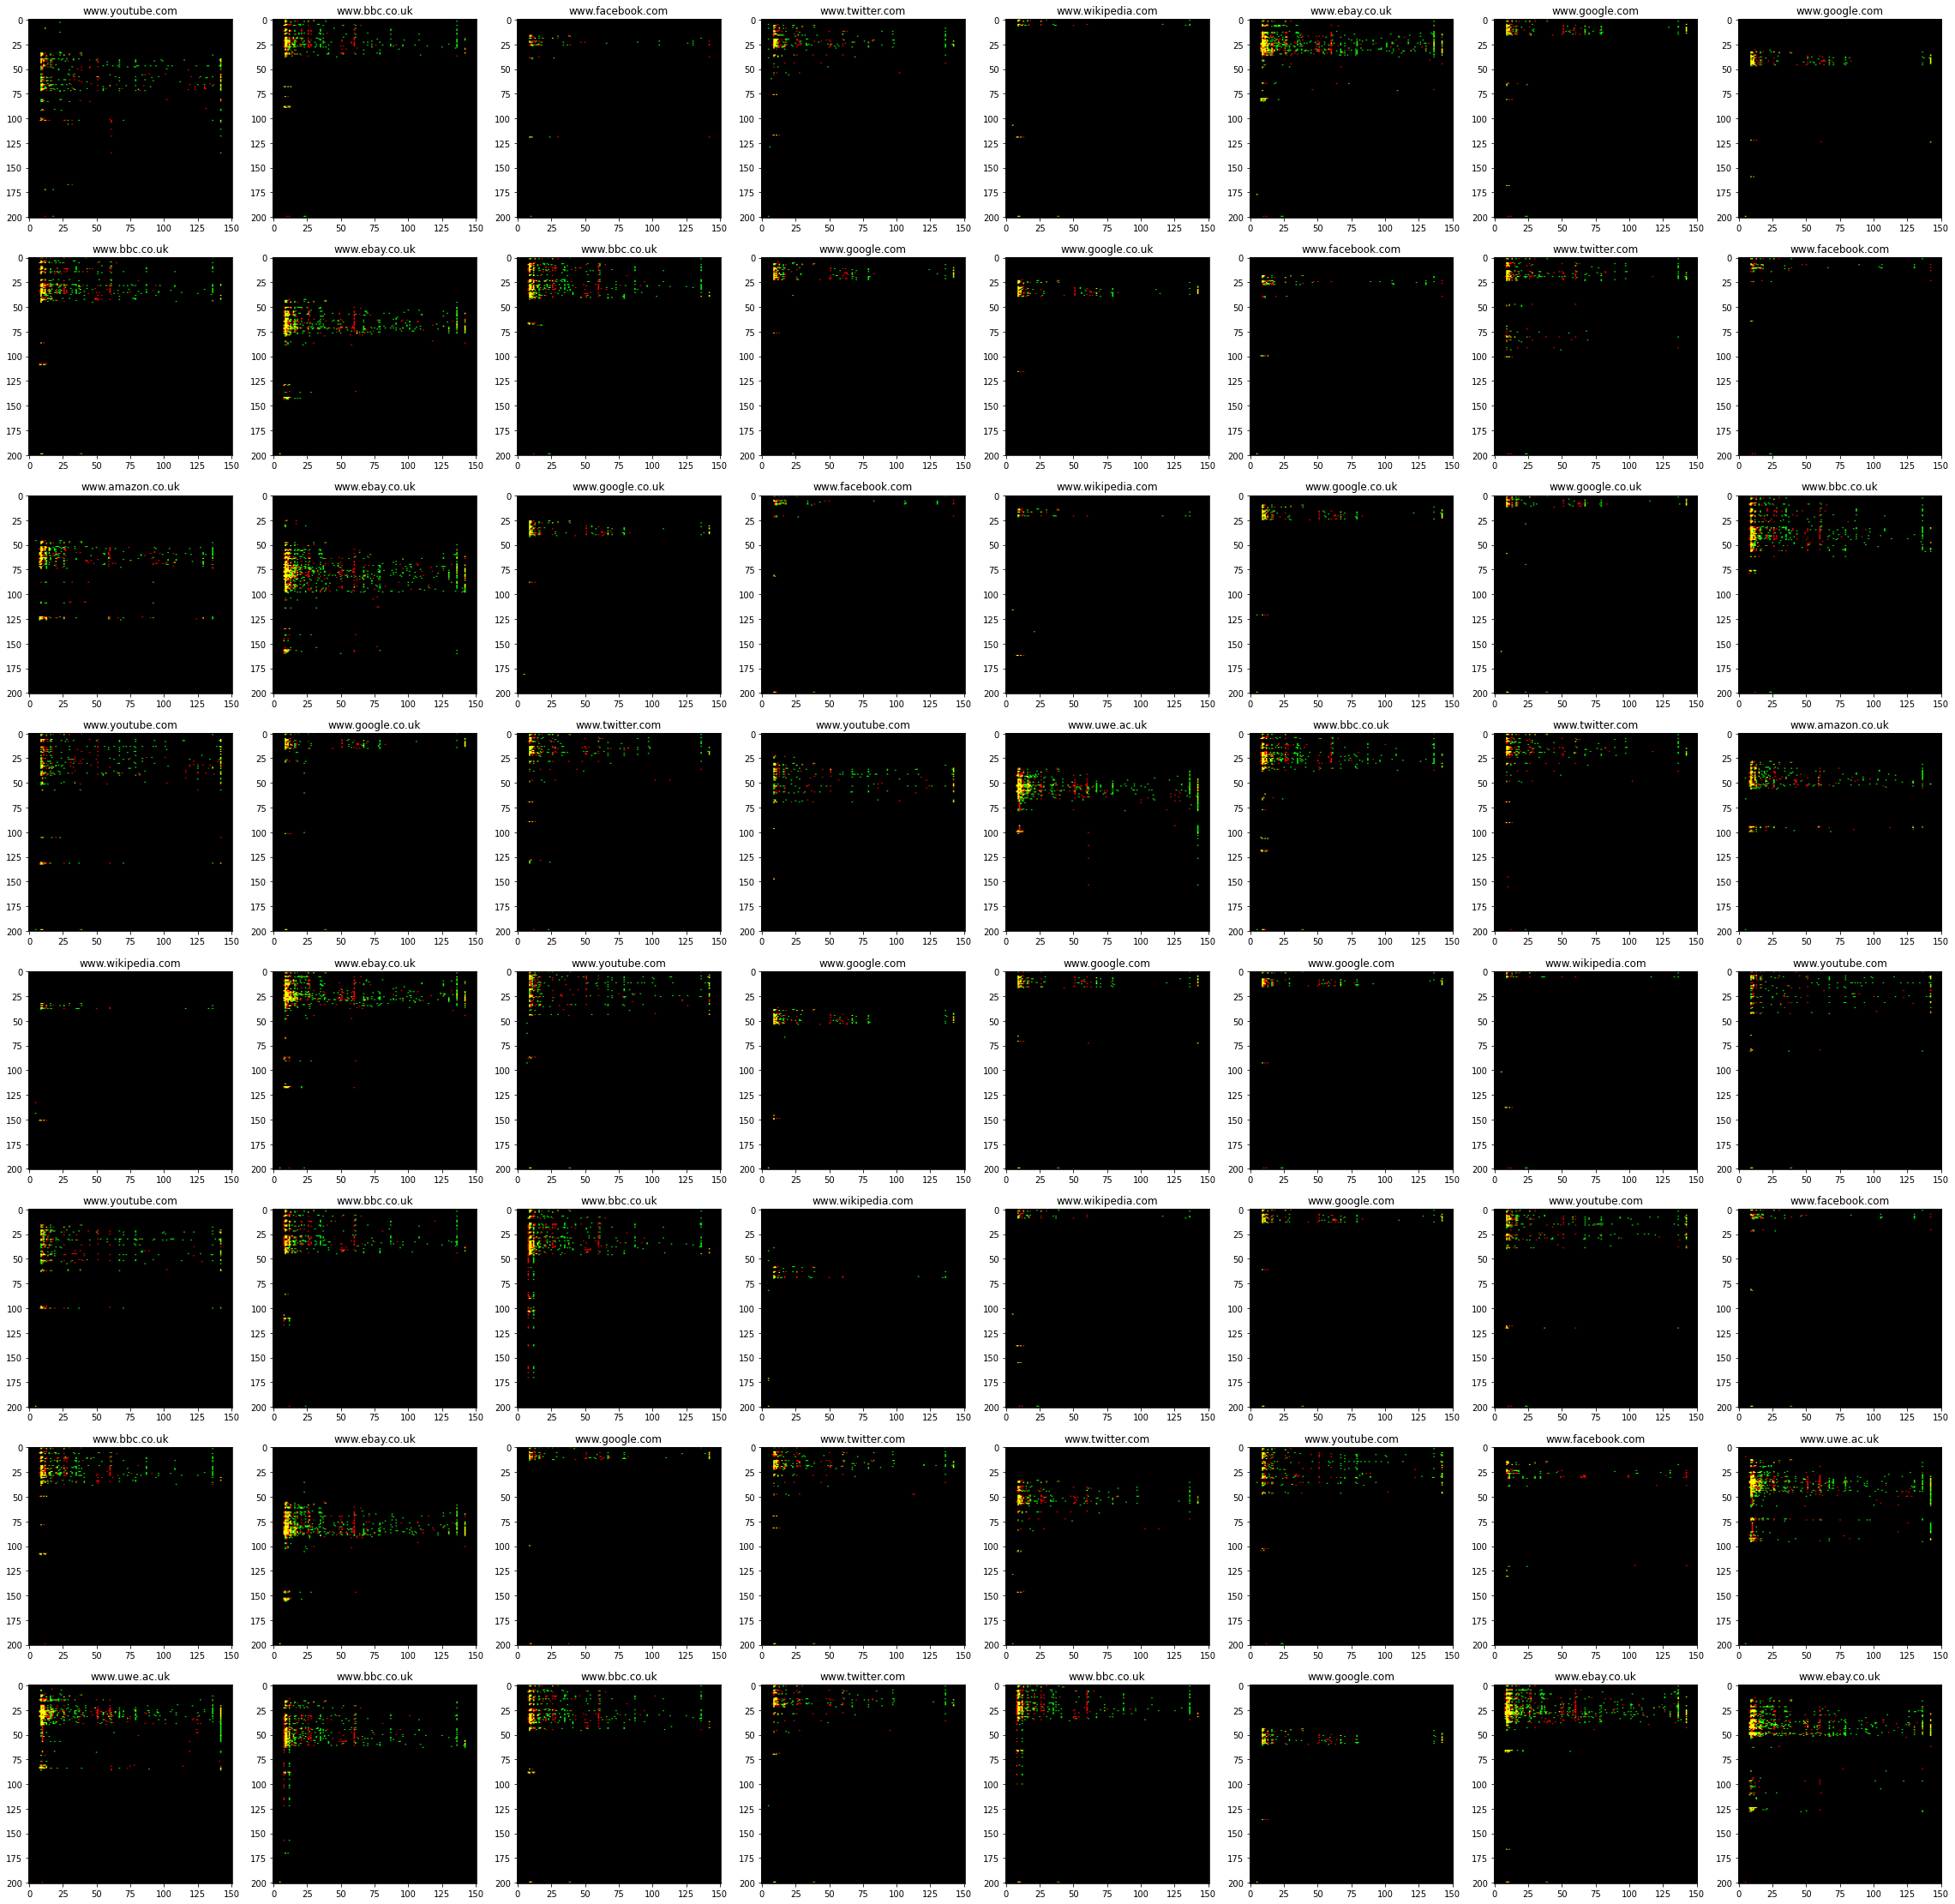

In [10]:
plt.figure(figsize=(40,40))

for i in range(64):
    plt.subplot(8,8,i +1)
    plt.imshow(np.pad(features[i], (0,1)) * 255, aspect="auto")
    plt.title(f"{labels[i]}")

In [18]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels_encoded,
    test_size=0.25,
    shuffle=True,
    random_state=SEED
)

In [19]:
max = features_train.max()

features_train = features_train/max
features_test = features_test/max

In [20]:
dummy_model = DummyClassifier(random_state=SEED)

dummy_model.fit(features_train, labels_train)
print(dummy_model.score(features_test, labels_test))

0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0


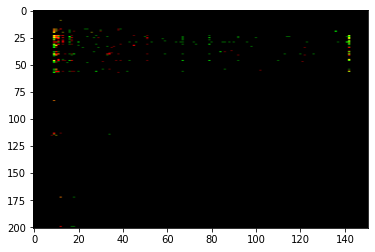

In [21]:
print(features_train.max())
plt.imshow(np.pad(features_train[0] * 255, (0,1)), aspect="auto")

In [22]:
early_stopping_callback = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [23]:
opt = tf.keras.optimizers.Adam(learning_rate=1)
cnn.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
cnn_history = cnn.fit(features_train, labels_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping_callback])

Epoch 1/50
113/113 [==============================] - 61s 532ms/step - loss: 7870834688.0000 - accuracy: 0.0894 - val_loss: 2.3627 - val_accuracy: 0.0911
Epoch 2/50
113/113 [==============================] - 59s 525ms/step - loss: 2.4126 - accuracy: 0.0994 - val_loss: 2.4046 - val_accuracy: 0.1089
Epoch 3/50
113/113 [==============================] - 58s 517ms/step - loss: 2.4154 - accuracy: 0.1033 - val_loss: 2.6039 - val_accuracy: 0.1089
Epoch 4/50
113/113 [==============================] - 54s 478ms/step - loss: 2.4149 - accuracy: 0.1150 - val_loss: 2.4286 - val_accuracy: 0.1089
Epoch 5/50
113/113 [==============================] - 58s 513ms/step - loss: 2.4264 - accuracy: 0.0956 - val_loss: 2.4677 - val_accuracy: 0.1133
Epoch 6/50
113/113 [==============================] - 58s 510ms/step - loss: 2.4333 - accuracy: 0.1039 - val_loss: 2.3779 - val_accuracy: 0.1200


In [24]:
cnn.evaluate(features_test, labels_test)

24/24 [==============================] - 3s 138ms/step - loss: 2.3715 - accuracy: 0.0840


[2.371460199356079, 0.08399999886751175]

In [25]:
def plot_history(history):
    fig, axs = plt.subplots(1, 2, figsize=(10,5)) 
    (ax1, ax2) = axs
    ax1.plot(history.history['loss'], label='train')
    ax1.plot(history.history['val_loss'], label='validation')

    ax1.legend(loc="upper right")
    ax1.set_xlabel("# of epochs")
    ax1.set_ylabel("loss")

    ax2.plot(history.history['accuracy'], label='train')
    ax2.plot(history.history['val_accuracy'], label='validation')

    ax2.legend(loc="upper right")
    ax2.set_xlabel("# of epochs")
    ax2.set_ylabel("accuracy")

    print("Final training accuracy:", history.history['accuracy'][-1])
    print("Final validation accuracy:", history.history['val_accuracy'][-1])

Final training accuracy: 0.10388889163732529
Final validation accuracy: 0.11999999731779099


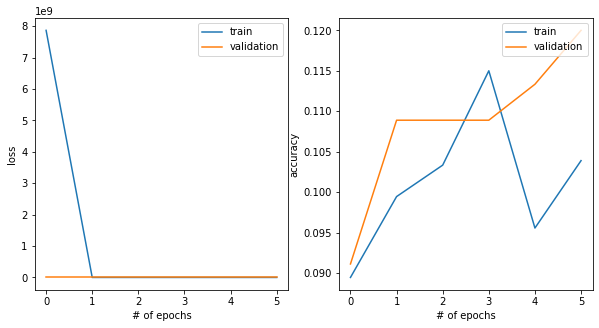

In [26]:
plot_history(cnn_history)

In [27]:
def plot_results(model):
    predictions =  model.predict(features_test)
    cm = confusion_matrix(labels_test, predictions, labels=model.classes_, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_binariser.inverse_transform(model.classes_))
    disp.plot(xticks_rotation=270, values_format=".1f")
    plt.show()
    print(classification_report(labels_test, predictions))

In [28]:
y_true = np.argmax(labels_test, axis=1)
unique_y = np.unique(y_true)

In [30]:
predictions =  np.argmax(cnn.predict(features_test), axis=1)
[label_binariser.classes_[x] for x in range(unique_y.min(), len(unique_y))]

['www.amazon.co.uk',
 'www.bbc.co.uk',
 'www.ebay.co.uk',
 'www.facebook.com',
 'www.google.co.uk',
 'www.google.com',
 'www.twitter.com',
 'www.uwe.ac.uk',
 'www.wikipedia.com',
 'www.youtube.com']

In [31]:
def plot_results(model):
    fig, ax = plt.subplots(figsize=(12, 12))
    y_true = np.argmax(labels_test, axis=1)
    predictions =  np.argmax(model.predict(features_test), axis=1)
    cm = confusion_matrix(y_true, predictions, normalize='true')
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=[label_binariser.classes_[x] for x in range(unique_y.min(), len(unique_y))]
        )
    disp.plot(xticks_rotation=270, values_format=".1f", ax=ax)
    plt.show()
    print(classification_report(y_true, predictions))

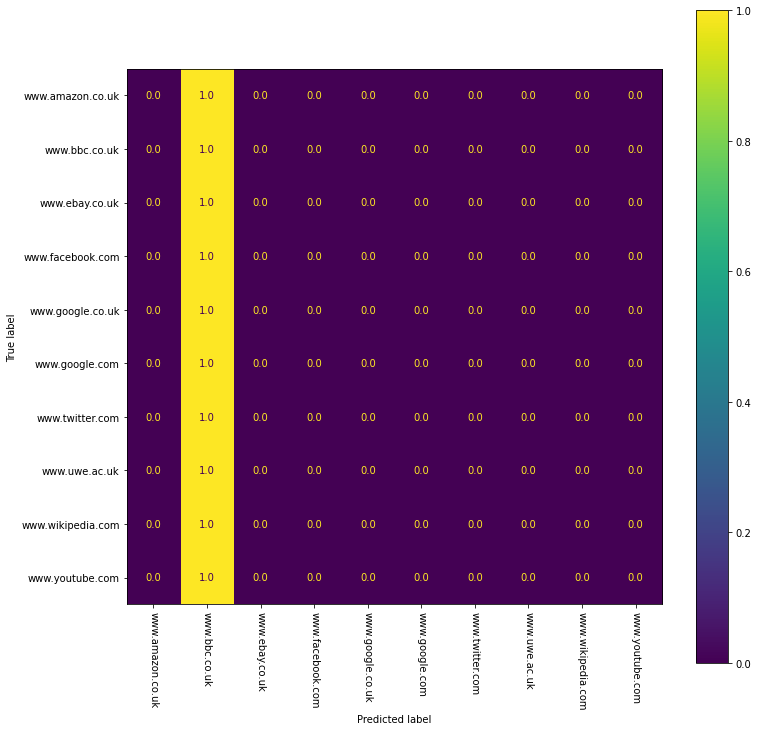

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.08      1.00      0.15        63
           2       0.00      0.00      0.00        73
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00        65
           5       0.00      0.00      0.00        79
           6       0.00      0.00      0.00        76
           7       0.00      0.00      0.00        68
           8       0.00      0.00      0.00        84
           9       0.00      0.00      0.00        82

    accuracy                           0.08       750
   macro avg       0.01      0.10      0.02       750
weighted avg       0.01      0.08      0.01       750



/Users/michaelkearney/.local/share/virtualenvs/UNB_Datasets-qeLdalLc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michaelkearney/.local/share/virtualenvs/UNB_Datasets-qeLdalLc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michaelkearney/.local/share/virtualenvs/UNB_Datasets-qeLdalLc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use 

In [32]:
plot_results(cnn)

In [46]:
def create_convlstm_model():

    model = keras.Sequential()

    model.add(layers.ConvLSTM1D(
        filters = 4,
        kernel_size=5,
        activation="tanh",
        data_format="channels_last",
        recurrent_dropout=0.2,
        return_sequences=True,
        input_shape = (features_train[0].shape)
    ))

    model.add(layers.MaxPooling2D(
        pool_size = (1, 2),
        padding = 'same',
        data_format = "channels_last"
    ))

    model.add(layers.TimeDistributed(layers.Dropout(0.2)))
    # Dropout layer for sequence data



    model.add(layers.ConvLSTM1D(
        filters=10,
        kernel_size=15,
        activation="tanh",
        data_format="channels_last",
        recurrent_dropout=0.2,
        return_sequences=True
    ))

    model.add(layers.MaxPooling2D(
        pool_size = (1, 2),
        padding = 'same',
        data_format = "channels_last"
    ))

    model.add(layers.TimeDistributed(layers.Dropout(0.2)))


    model.add(layers.ConvLSTM1D(
        filters=14,
        kernel_size=10,
        activation="tanh",
        data_format="channels_last",
        recurrent_dropout=0.2,
        return_sequences=True
    ))

    model.add(layers.MaxPooling2D(
        pool_size = (1, 2),
        padding = 'same',
        data_format = "channels_last"
    ))

    model.add(layers.TimeDistributed(layers.Dropout(0.2)))


    model.add(layers.ConvLSTM1D(
        filters=16,
        kernel_size=10,
        activation="tanh",
        data_format="channels_last",
        recurrent_dropout=0.2,
        return_sequences=True
    ))

    model.add(layers.MaxPooling2D(
        pool_size = (1, 2),
        padding = 'same',
        data_format = "channels_last"
    ))

    # model.add(TimeDistributed(Dropout(0.2)))


    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation="relu"))
    
    model.add(layers.Dense(labels_encoded.shape[1], activation="softmax"))

    model.summary()

    return model

In [47]:
convlstm_model = create_convlstm_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm1d (ConvLSTM1D)    (None, 200, 146, 4)       496       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 200, 73, 4)       0         
 2D)                                                             
                                                                 
 time_distributed (TimeDistr  (None, 200, 73, 4)       0         
 ibuted)                                                         
                                                                 
 conv_lstm1d_1 (ConvLSTM1D)  (None, 200, 59, 10)       8440      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 200, 30, 10)      0         
 2D)                                                             
                                                      

In [48]:
convlstm_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
convlstm_history = convlstm_model.fit(x=features_train, y=labels_train, epochs=30, batch_size=16, shuffle=True, validation_split=0.2, callbacks=[early_stopping_callback])

Epoch 1/30
113/113 [==============================] - 304s 3s/step - loss: 2.0468 - accuracy: 0.1989 - val_loss: 1.8862 - val_accuracy: 0.3356
Epoch 2/30
113/113 [==============================] - 292s 3s/step - loss: 1.2960 - accuracy: 0.4800 - val_loss: 1.0104 - val_accuracy: 0.5511
Epoch 3/30
113/113 [==============================] - 290s 3s/step - loss: 0.7111 - accuracy: 0.7128 - val_loss: 0.5727 - val_accuracy: 0.8156
Epoch 4/30
113/113 [==============================] - 289s 3s/step - loss: 0.4308 - accuracy: 0.8306 - val_loss: 0.3639 - val_accuracy: 0.8578
Epoch 5/30
113/113 [==============================] - 288s 3s/step - loss: 0.4062 - accuracy: 0.8267 - val_loss: 0.4709 - val_accuracy: 0.7533
Epoch 6/30
113/113 [==============================] - 288s 3s/step - loss: 0.3045 - accuracy: 0.8594 - val_loss: 0.2636 - val_accuracy: 0.8756
Epoch 7/30
113/113 [==============================] - 288s 3s/step - loss: 0.2639 - accuracy: 0.8600 - val_loss: 0.2844 - val_accuracy: 0.8644

Final training accuracy: 0.8933333158493042
Final validation accuracy: 0.8822222352027893


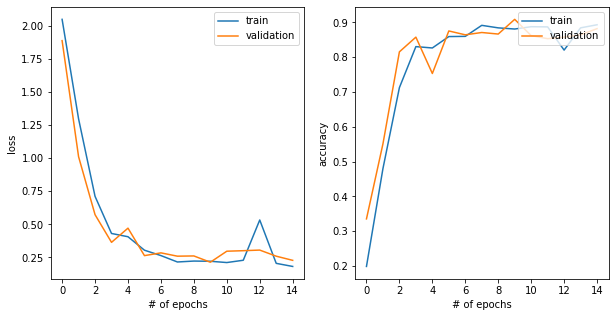

In [49]:
plot_history(convlstm_history)

In [50]:
model_evaluation_history = convlstm_model.evaluate(features_test, labels_test)
loss, acc = model_evaluation_history
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_datetime = dt.datetime.now()
current_datetime_string = dt.datetime.strftime(current_datetime, date_time_format)
model_file_name =f"convlstm_model_Datetime_{current_datetime_string}__loss_{loss}_acc_{acc}.h5"
convlstm_model.save(model_file_name)

24/24 [==============================] - 8s 335ms/step - loss: 0.1937 - accuracy: 0.9253


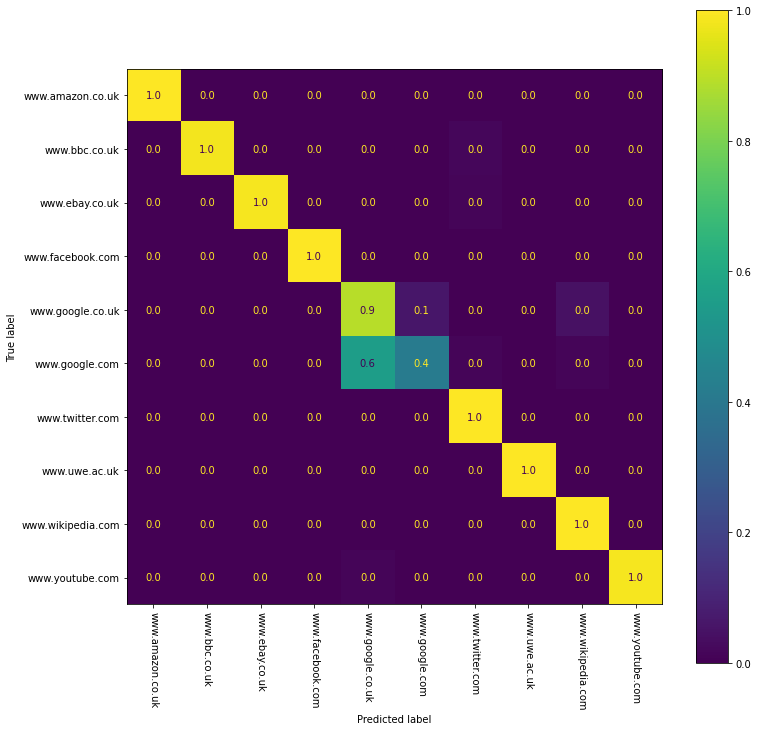

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      0.98      0.99        63
           2       1.00      0.99      0.99        73
           3       1.00      1.00      1.00        79
           4       0.56      0.89      0.69        65
           5       0.89      0.42      0.57        79
           6       0.96      1.00      0.98        76
           7       1.00      1.00      1.00        68
           8       0.95      1.00      0.98        84
           9       1.00      0.99      0.99        82

    accuracy                           0.93       750
   macro avg       0.94      0.93      0.92       750
weighted avg       0.94      0.93      0.92       750



In [51]:
plot_results(convlstm_model)

In [52]:
def create_lrcn_model():

    model = keras.Sequential()

    model.add(
        layers.TimeDistributed(
            layers.Conv1D(
                filters=16,
                kernel_size=3,
                padding="same",
                activation="relu"
            ),
        input_shape=(features_train[0].shape)
        )
    )
  
    model.add(
        layers.TimeDistributed(
            layers.Dropout(0.25)
        )
    )

    model.add(
        layers.TimeDistributed(
            layers.Conv1D(
                filters=32,
                kernel_size=3,
                padding="same",
                activation="relu"
            )
        )
    )

    model.add(
        layers.TimeDistributed(
            layers.Dropout(0.25)
        )
    )

    model.add(
        layers.TimeDistributed(
            layers.Conv1D(
                filters=64,
                kernel_size=3,
                padding="same",
                activation="relu"
            )
        )
    )

    model.add(
        layers.TimeDistributed(
            layers.Dropout(0.25)
        )
    )

    model.add(
        layers.TimeDistributed(
            layers.Conv1D(
                filters=64,
                kernel_size=3,
                padding="same",
                activation="relu"
            )
        )
    )

    model.add(
        layers.TimeDistributed(
            layers.Flatten()
        )
    )

    model.add(
        layers.LSTM(32)
    )

    model.add(
        layers.Dense(
            labels_encoded.shape[1],
            activation="softmax"
        )
    )

    model.summary()

    return model

In [53]:
lrcn_model = create_lrcn_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_3 (TimeDis  (None, 200, 150, 16)     112       
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 200, 150, 16)     0         
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 200, 150, 32)     1568      
 tributed)                                                       
                                                                 
 time_distributed_6 (TimeDis  (None, 200, 150, 32)     0         
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 200, 150, 64)    

In [54]:
lrcn_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
lrcn_history = lrcn_model.fit(x=features_train, y=labels_train, epochs=30, batch_size=16, shuffle=True, validation_split=0.2, callbacks=[early_stopping_callback])

Epoch 1/30
113/113 [==============================] - 200s 2s/step - loss: 2.3029 - accuracy: 0.1072 - val_loss: 2.3032 - val_accuracy: 0.0822
Epoch 2/30
113/113 [==============================] - 195s 2s/step - loss: 2.3019 - accuracy: 0.1194 - val_loss: 2.3053 - val_accuracy: 0.0822
Epoch 3/30
113/113 [==============================] - 191s 2s/step - loss: 2.3014 - accuracy: 0.1194 - val_loss: 2.3050 - val_accuracy: 0.0822
Epoch 4/30
113/113 [==============================] - 199s 2s/step - loss: 2.3017 - accuracy: 0.1194 - val_loss: 2.3069 - val_accuracy: 0.0822
Epoch 5/30
113/113 [==============================] - 194s 2s/step - loss: 2.3014 - accuracy: 0.1194 - val_loss: 2.3064 - val_accuracy: 0.0822
Epoch 6/30
113/113 [==============================] - 196s 2s/step - loss: 2.3012 - accuracy: 0.1194 - val_loss: 2.3064 - val_accuracy: 0.0822


In [55]:
model_evaluation_history = lrcn_model.evaluate(features_test, labels_test)

24/24 [==============================] - 11s 462ms/step - loss: 2.3033 - accuracy: 0.0907


Final training accuracy: 0.11944444477558136
Final validation accuracy: 0.08222222328186035


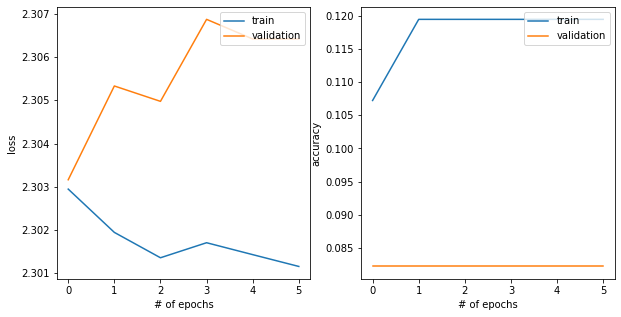

In [56]:
plot_history(lrcn_history)

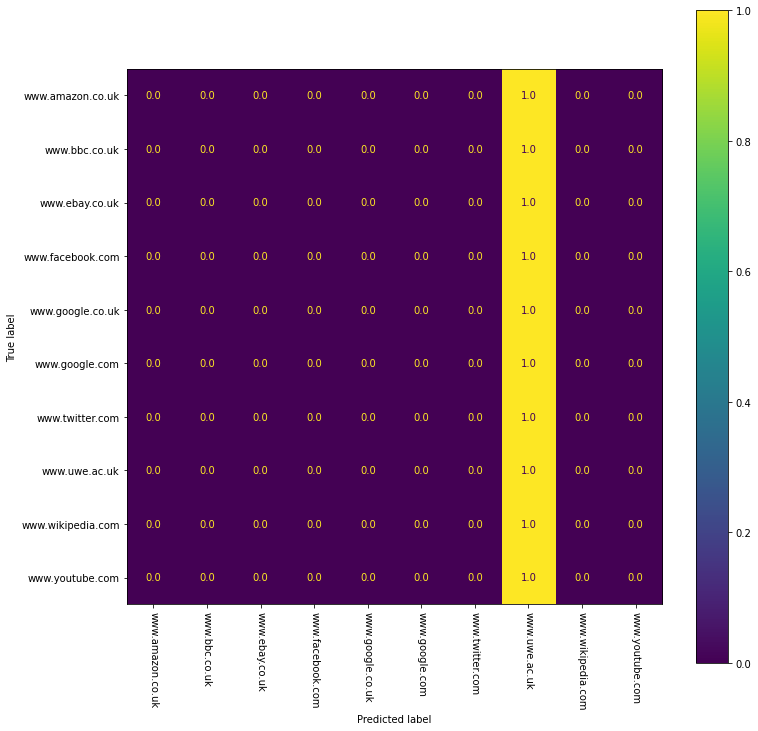

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.00      0.00      0.00        63
           2       0.00      0.00      0.00        73
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00        65
           5       0.00      0.00      0.00        79
           6       0.00      0.00      0.00        76
           7       0.09      1.00      0.17        68
           8       0.00      0.00      0.00        84
           9       0.00      0.00      0.00        82

    accuracy                           0.09       750
   macro avg       0.01      0.10      0.02       750
weighted avg       0.01      0.09      0.02       750



/Users/michaelkearney/.local/share/virtualenvs/UNB_Datasets-qeLdalLc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michaelkearney/.local/share/virtualenvs/UNB_Datasets-qeLdalLc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michaelkearney/.local/share/virtualenvs/UNB_Datasets-qeLdalLc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use 

In [57]:
plot_results(lrcn_model)